# Prediction using keras

Let us import pandas to read our csv file.

In [25]:
import pandas as pd

In [26]:
df=pd.read_csv('Dataset/train_clean_data.csv')

In [27]:
df.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


Let us assign price as output and rest all of the columns as input.

In [28]:
X=df.drop(['Price'],axis=1)
y=df[['Price']]
X=X.iloc[:,:].values
y=y.iloc[:,:].values

In [29]:
X

array([[ 0,  3, 24, ...,  0,  0,  1],
       [ 2,  5,  1, ...,  0,  0,  0],
       [ 2,  6,  9, ...,  0,  0,  0],
       ...,
       [ 0,  4, 27, ...,  0,  0,  0],
       [ 0,  3,  1, ...,  0,  0,  1],
       [ 2,  5,  9, ...,  0,  0,  0]], dtype=int64)

In [30]:
X.shape

(10681, 28)

In [31]:
y

array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]], dtype=int64)

In [32]:
y.shape

(10681, 1)

Let us normalize our input and output.

In [33]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


In [34]:
X_scaled

array([[-1.22058845, -1.46761891,  1.23719214, ..., -0.26401621,
        -0.1923286 ,  3.23423877],
       [ 1.74138025,  0.25016506, -1.47537531, ..., -0.26401621,
        -0.1923286 , -0.30919177],
       [ 1.74138025,  1.10905704, -0.53187359, ..., -0.26401621,
        -0.1923286 , -0.30919177],
       ...,
       [-1.22058845, -0.60872693,  1.59100529, ..., -0.26401621,
        -0.1923286 , -0.30919177],
       [-1.22058845, -1.46761891, -1.47537531, ..., -0.26401621,
        -0.1923286 ,  3.23423877],
       [ 1.74138025,  0.25016506, -0.53187359, ..., -0.26401621,
        -0.1923286 , -0.30919177]])

In [35]:
y_scaled

array([[-1.12564296],
       [-0.30917044],
       [ 1.03968987],
       ...,
       [-0.4030702 ],
       [ 0.7720864 ],
       [ 0.57799797]])

Let us import Sequential for declaring our model and Dense to specify number of layers.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Let us define keras model with 18 layers with input layer having 256 nodes, optimizer adam and loss mean_squared_error for regression.

In [40]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(28,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [41]:
model = regression_model()

Let us fit our training data.

In [42]:
model.fit(X_scaled, y_scaled, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
234/234 - 1s - loss: 0.4840 - val_loss: 0.3099
Epoch 2/100
234/234 - 1s - loss: 0.3754 - val_loss: 0.2626
Epoch 3/100
234/234 - 1s - loss: 0.2781 - val_loss: 0.2454
Epoch 4/100
234/234 - 0s - loss: 0.2697 - val_loss: 0.2720
Epoch 5/100
234/234 - 1s - loss: 0.2749 - val_loss: 0.2648
Epoch 6/100
234/234 - 1s - loss: 0.2310 - val_loss: 0.2314
Epoch 7/100
234/234 - 1s - loss: 0.3195 - val_loss: 0.3604
Epoch 8/100
234/234 - 1s - loss: 0.2647 - val_loss: 0.2200
Epoch 9/100
234/234 - 1s - loss: 0.2198 - val_loss: 0.2106
Epoch 10/100
234/234 - 0s - loss: 0.2247 - val_loss: 0.2132
Epoch 11/100
234/234 - 1s - loss: 0.1934 - val_loss: 0.2081
Epoch 12/100
234/234 - 1s - loss: 0.2213 - val_loss: 0.2907
Epoch 13/100
234/234 - 0s - loss: 0.2339 - val_loss: 0.2481
Epoch 14/100
234/234 - 0s - loss: 0.1976 - val_loss: 0.2156
Epoch 15/100
234/234 - 1s - loss: 0.1851 - val_loss: 0.2979
Epoch 16/100
234/234 - 1s - loss: 0.3426 - val_loss: 0.2401
Epoch 17/100
234/234 - 1s - loss: 0.2108 - val_lo

Let us import testing data and normalize it.

In [43]:
df=pd.read_csv('Dataset/test_clean_data.csv')

In [44]:
df.head()

,Total_Stops,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
X_test=df.iloc[:,:].values

In [46]:
X_test

array([[ 1,  6,  6, ...,  0,  0,  0],
       [ 1,  5, 12, ...,  0,  0,  0],
       [ 1,  5, 21, ...,  0,  0,  0],
       ...,
       [ 1,  3,  6, ...,  0,  0,  0],
       [ 1,  3,  6, ...,  0,  0,  0],
       [ 1,  6, 15, ...,  0,  0,  0]], dtype=int64)

In [47]:
X_test.shape

(2671, 28)

Let us normalize our testing data.

In [48]:
X_scaled_test = scaler.fit_transform(X_test)

In [50]:
X_scaled_test

array([[ 0.24785314,  1.09474457, -0.83733254, ..., -0.27358563,
        -0.16997235, -0.31276448],
       [ 0.24785314,  0.2405048 , -0.11087675, ..., -0.27358563,
        -0.16997235, -0.31276448],
       [ 0.24785314,  0.2405048 ,  0.97880692, ..., -0.27358563,
        -0.16997235, -0.31276448],
       ...,
       [ 0.24785314, -1.46797475, -0.83733254, ..., -0.27358563,
        -0.16997235, -0.31276448],
       [ 0.24785314, -1.46797475, -0.83733254, ..., -0.27358563,
        -0.16997235, -0.31276448],
       [ 0.24785314,  1.09474457,  0.25235114, ..., -0.27358563,
        -0.16997235, -0.31276448]])

Let us print predicted values.

In [51]:
pred=model.predict(X_scaled_test)
pred

array([[ 0.6088825 ],
       [-1.0005703 ],
       [ 1.1939752 ],
       ...,
       [ 1.4265465 ],
       [ 0.7751548 ],
       [-0.23864716]], dtype=float32)

Let us print our loss.

In [52]:
score = model.evaluate(X_scaled_test,pred,verbose=0)
print('Loss:',score)

Loss: 0.0


Our loss is 0.
It's highly accurate.

In [58]:
pred.shape

(2671, 1)

Let us display our outputs.

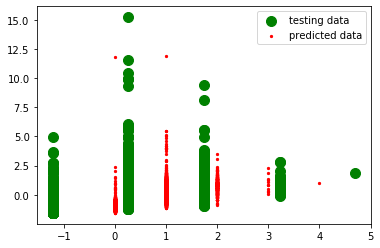

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_scaled[:,0], y_scaled, s = 100, c = 'g', label = 'testing data')
ax1.scatter(X_test[:,0], pred, s = 5, c = 'r', label = 'predicted data')
plt.legend(loc='upper right');
plt.show()